# Geo data

<div class="admonition note">
    <p class="admonition-title">In progress</p>
    <p>This document is a work in progress if you see any errors, or exclusions or have any problems, please <a href="https://github.com/absespy/ABSESpy/issues">get in touch with us</a>.</p>
</div>

This notebook shows how to work with geographic spatial datasets.

<!-- Download the data from [here](https://www.kaggle.com/c/tweet-sentiment-extraction/data) and place it in the `data` directory. -->

## Setup Geo spatial area

In `yaml` settings file, when assigning the `world` parameter of a `nature` module as a path of map, module will automatically read this map as the "basemap".

```yaml
world: data/mean_prec.tif
```


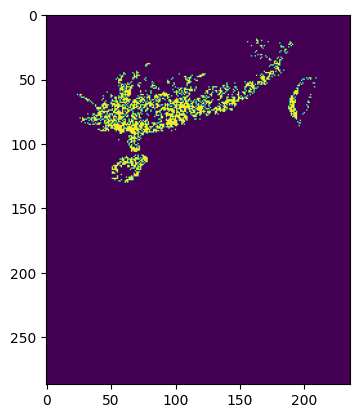

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import rasterio

# data path
data = Path("data/farmland.tif")

# read dataset
with rasterio.open(data) as src:
    img = src.read(1)
plt.imshow(img)

`ABSESpy` can use this GeoTiff image data to create a spatial submodule directly.

Let's simply do so at first:

In [2]:
from abses import MainModel

# default model
model = MainModel()

sub_module = model.nature.create_module(
    how="from_file",
    raster_file=data,
)

sub_module

<patchmodule(287, 236): 0 vars>

In the above case, the sub-module doesn't have any data.
If we need to apply the data when loading GeoTiff image file, simply assign the parameter `apply_raster` as `True`.

It will call `apply_raster` method once, which accepts an optional argument `attr_name`. Here, we assign it as "test". So, the data will be stored in the submodule as an attribute `test`.


In [3]:
from abses import MainModel

# default model
model = MainModel()

sub_module = model.nature.create_module(
    how="from_file",
    raster_file=data,
    apply_raster=True,
    attr_name="test",
)

sub_module

<patchmodule(287, 236): 1 vars>

In [4]:
sub_module.attributes

{'test'}

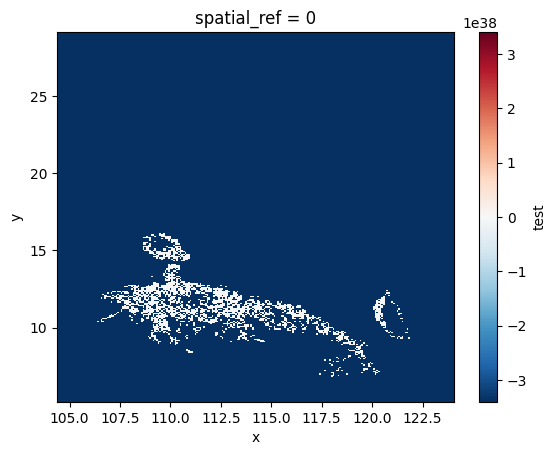

In [5]:
sub_module.get_xarray("test").plot()

Ooop! Sometimes datasets are not from upper corner.
We can flipud it to make it correct.

We don't have to re-load the dataset file. Since we cached it as a numpy array, we can simply apply this array by calling `apply_raster` method, with `flipud` argument is `True`.

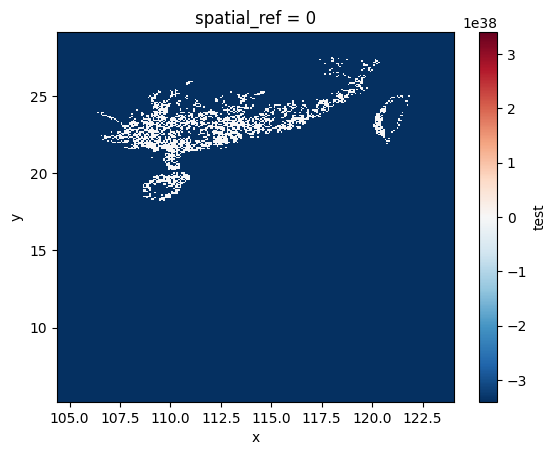

In [6]:
sub_module.apply_raster(data=img, attr_name="test", flipud=True)
sub_module.get_xarray("test").plot()